<a href="https://colab.research.google.com/github/brock-ricker/food_sales_predictions/blob/main/Project_1_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Predictions

- Brock Ricker

- last update 03/12/2022

#Parts 1 and 2

- Data importing and cleaning

- 03/06/2022

In [28]:
#Importing Data
import pandas as pd
filepath = "https://raw.githubusercontent.com/brock-ricker/food_sales_predictions/main/sales_predictions.csv"
df = pd.read_csv(filepath)


In [29]:
#Initial Data Exploration

#Question 1
print(f"{df.shape[0]} rows and {df.shape[1]} columns")

#Question 2
print(df.info())

8523 rows and 12 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [30]:
#Dropping Duplicates

#Question 3 - finding # of duplicates
dups = df.duplicated()
print(pd.value_counts(dups))
#This is coming back as false (non-dupicates) = 8523, which is the same number of rows as original table, meaning there are no duplicates
#another way to check is to try dropping duplicates and then check the size of the resulting table
df = df.drop_duplicates()
df.info()
#same size as original, no duplicates

False    8523
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [31]:
#Question 7 addressing  inconsistent data
#Lets look at unique values for each column and see if there are any oddities. I will skip the item identifier, because I would not be able to spot inconsistincies in those
#First lets split into numerical data and object types.
df_ints = df.select_dtypes(include = ["int64","float64"])
pd.set_option('display.max_columns', None)
df_ints.describe()
#All of these numbers seem OK

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [43]:
#Question 7 addressing  inconsistent data cont. - categorical
df_obj = df.select_dtypes(include = "object")
df_obj = df_obj.drop(columns = "Item_Identifier")
df_obj_cols = list(df_obj)
for col in df_obj_cols:
  print(f"{col}: {df_obj[col].unique()}\n")
#only column with issues is fat content

Item_Fat_Content: ['Low Fat' 'Regular']

Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size: ['Medium' nan 'High' 'Small']

Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [44]:
#fat content
#first lets create the replacement dict
fat_cont = {"low fat":"Low Fat",
            "LF":"Low Fat",
            "reg":"Regular"
            }

df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(to_replace = fat_cont)

#and check it
print(df["Item_Fat_Content"].unique())
#looks good

['Low Fat' 'Regular']


#Part 3

- Exploratory Vis

- 03/12/2022

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


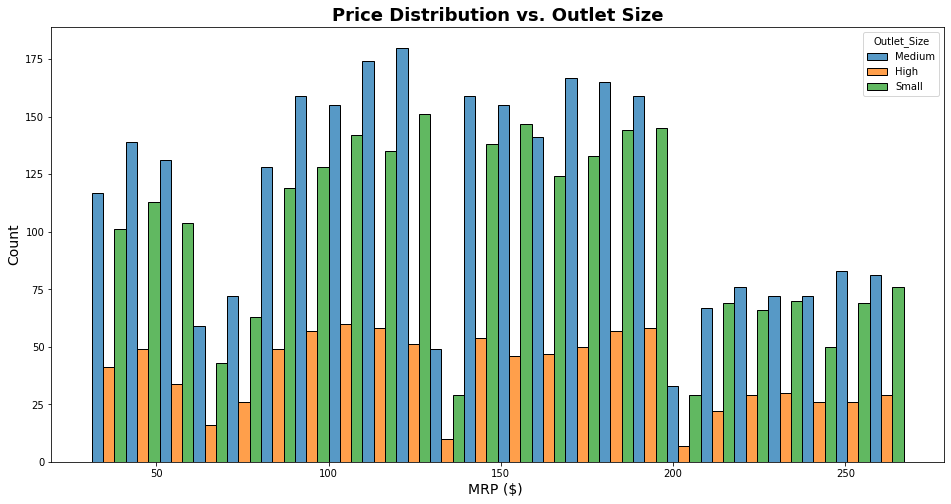

In [18]:
#Histogram
#Lets look at the distribution of prices for items, and see if the outlet size has any effect on the price of the items they carry
plt.figure(figsize = (16,8))
plot_hist = sns.histplot(data = df, x = "Item_MRP", hue = "Outlet_Size", multiple = "dodge")
plot_hist.set_title('Price Distribution vs. Outlet Size',fontsize = 18, fontweight='bold' )
plot_hist.set_xlabel('MRP ($) ', fontsize = 14)
plot_hist.set_ylabel('Count', fontsize = 14);
print(pd.value_counts(df["Outlet_Size"]))
#Looks like the distribution of prices is roughly equal, but there are not many stores in the "high" category, which is why the counts are smaller for each bin in that size category

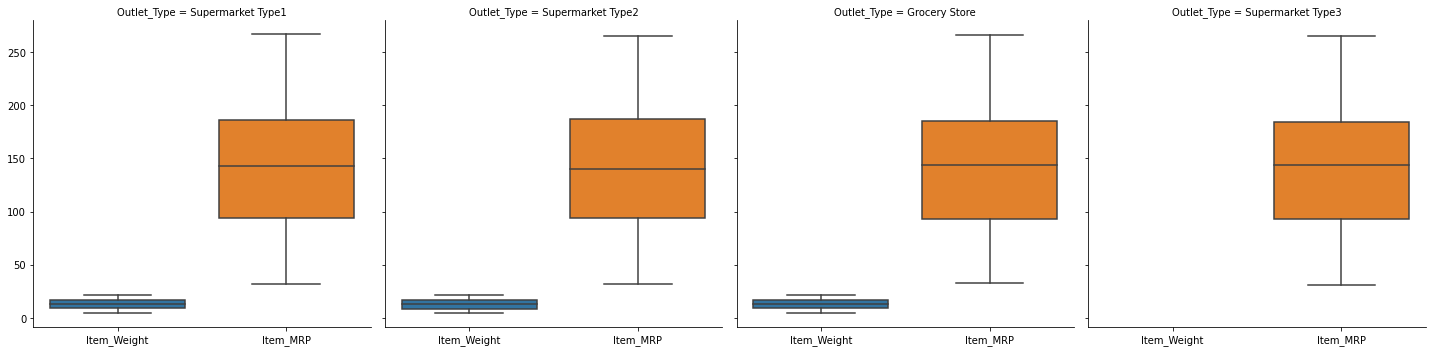

In [19]:
#Boxplot
#Now lets try using boxplots to compare different items info accross different outlet types
df_item_info = df[["Item_Weight","Item_MRP","Outlet_Type"]]
plot_box = sns.catplot(data=df_item_info, col="Outlet_Type", kind="box")
#This is actually better for distribution comparison, because boxplots show sumamry statistics instead of counts.
#the distribution of items prices and weights accross the different store types is very similar

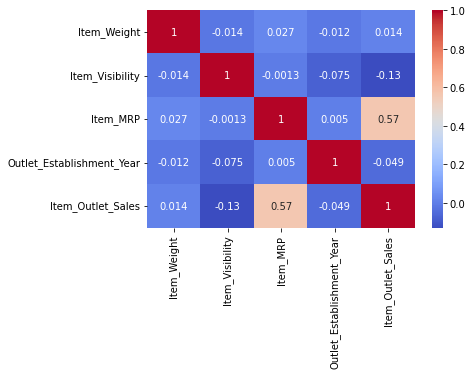

In [20]:
#Heatmap
corr = df.corr()
sns.heatmap(corr, cmap = "coolwarm", annot = True);
#Interesting, looks like there is a correlation between item MRP, and sales ($) makes sense, more expensive items make the store more money

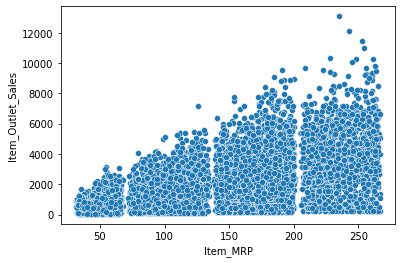

In [21]:
#Lets look at that relationship
sns.scatterplot(data=df, x = "Item_MRP", y = "Item_Outlet_Sales");
#looks like the the price of an item, determines an upper bound of how much money a store can make on that specific item. This makes sense.

#Part 4

- Explanatory Vis

- 03/17/2022

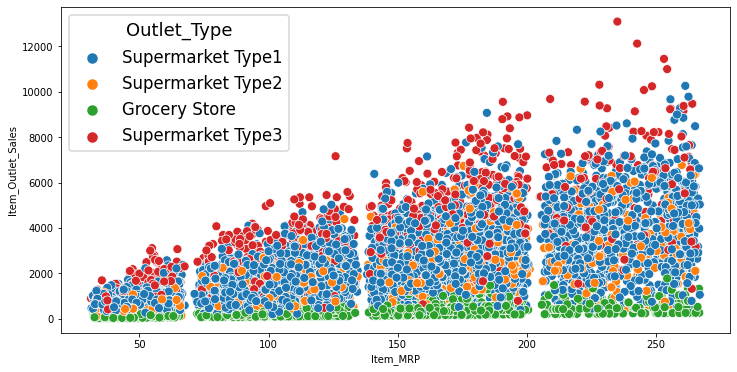

In [22]:
#Lets further explore the trend we found in the previous section
fig, ax = plt.subplots(figsize=(12,6))
sns.set_context('talk')
sns.scatterplot(data=df, x = "Item_MRP", y = "Item_Outlet_Sales",hue = "Outlet_Type", ax=ax);

In [23]:
#looks like there is some difference in the amount of items each store type sells, but it is difficult to tell with them graphed on top of each other. Lets turn this plot into a function and split them up.
def sales_plot(dataframe,outlet_type):
  df_active = dataframe.loc[dataframe["Outlet_Type"]==outlet_type]
  fig, ax = plt.subplots(figsize=(12,6));
  ax.set(title=f'Item Sales($) vs. Item Price for {outlet_type}');
  sns.set_context('talk');
  ax.set_xlim(left=0,right=275)
  ax.set_xlabel("Item MRP ($)")
  ax.set_ylim(bottom=0,top=13000)
  ax.set_ylabel("Total Item Outlet Sales ($)")
  sns.scatterplot(data=df_active, x = "Item_MRP", y = "Item_Outlet_Sales", hue = "Outlet_Identifier",ax=ax);
  return fig,ax


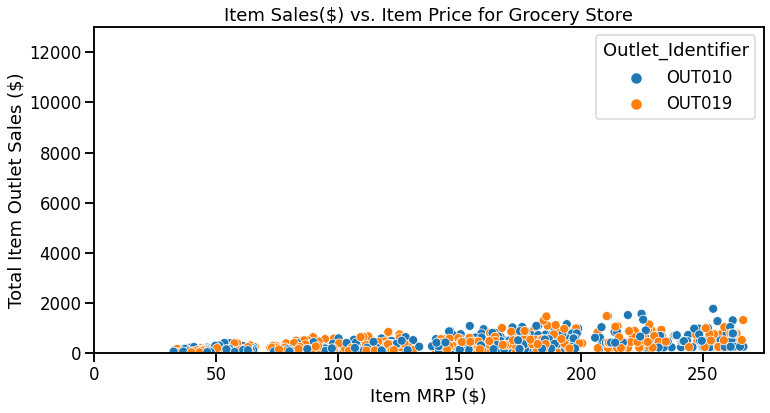

In [24]:
fig, ax = sales_plot(df,"Grocery Store")

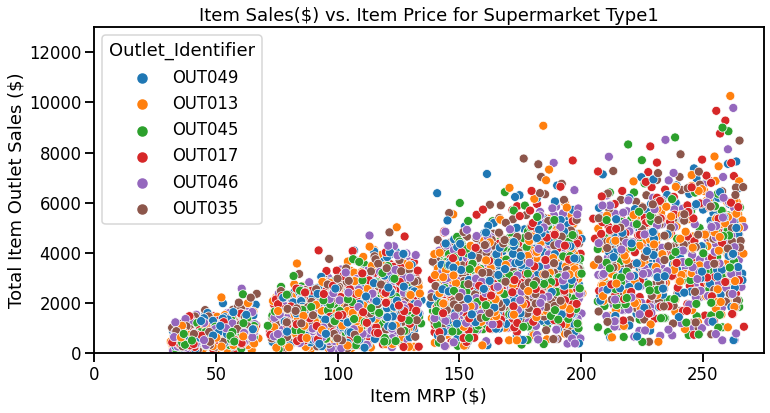

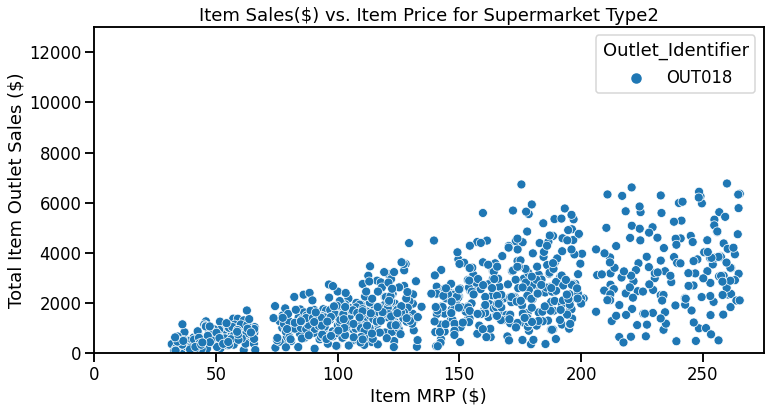

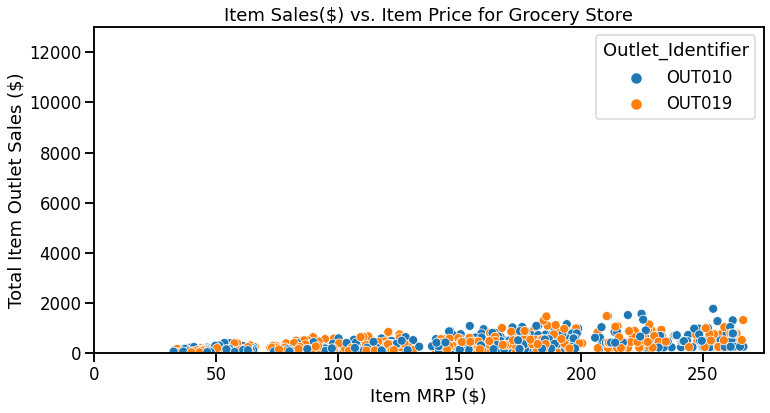

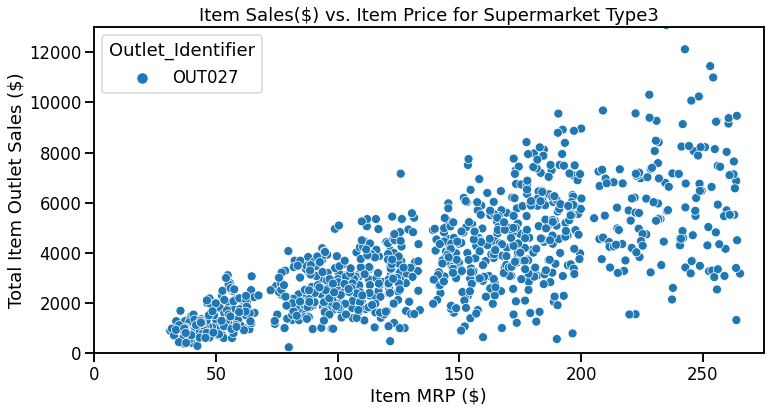

In [25]:
types = df["Outlet_Type"].unique()

for out_type in types:
  fig, ax = sales_plot(df,out_type)

#Looks like there is a relationship between outlet type and how much money they earn from certain products. This makes sense as the supermarkets do more volume thatn grocery stores.

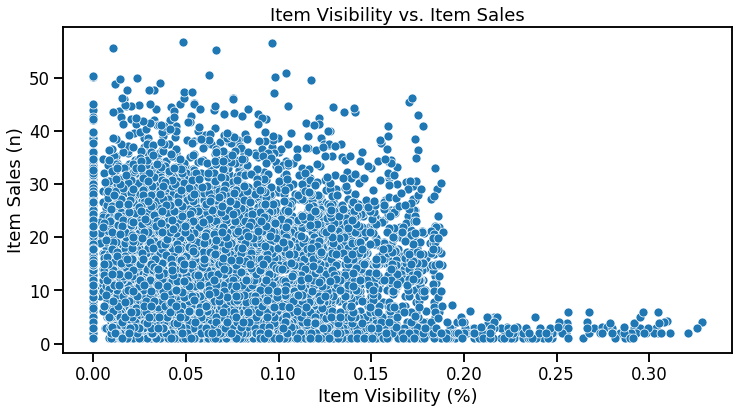

In [26]:
#Looks like the Item_Outlet_Sales is in amount of money, so lets calculate the number of items sold and analyze that.

df["Number_Of_Item_Outlet_Sales"] = df["Item_Outlet_Sales"]/df["Item_MRP"]



fig, ax = plt.subplots(figsize=(12,6));
ax.set(title='Item Visibility vs. Item Sales');
sns.set_context('talk');
ax.set_xlabel("Item Visibility (%)");
ax.set_ylabel("Item Sales (n)");
sns.scatterplot(data = df, x = "Item_Visibility", y="Number_Of_Item_Outlet_Sales");

#Looks like there is a weak negative correlation between visibility and # of items sold. This is probably because they make bad selling items more visible in an attempt to sell more.

#Part 5
- Preprocessing

- 03/27/2022

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config
set_config(display='diagram')

In [45]:
#Defining Features and Target

X = df.drop(columns = "Item_Outlet_Sales")
y = df["Item_Outlet_Sales"]

In [47]:
#There are several columns that are ordinal, these need to be recoded before I can move on.



df["Item_Fat_Content"].replace({"Low Fat":0,"Regular":1}, inplace = True)

#for this one, I am making the assumption that tier 1 = best location type and tier 3 = worst
df["Outlet_Location_Type"].replace({'Tier 3':0 ,'Tier 2':1, 'Tier 1':2}, inplace = True)

#Outlet size is also ordinal, but it has missing values, and there is no numerical equivalent of "missing" so I am going to impute/encode that column instead

In [48]:
#creating train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
#In order to prevent data leakage, I removed the portion of my previous code that filled in missing values, instead I will use simple imputer.

#instantiate imputers
mean_imputer = SimpleImputer(strategy = "mean")
cons_imputer = SimpleImputer(strategy = "constant", fill_value = "unknown")


In [50]:
#creating column selectors
cat_column_selector = make_column_selector(dtype_include = "object")
num_column_selector = make_column_selector(dtype_include = "number")

In [51]:
#instantiate encoder
encoder = OneHotEncoder(sparse = False, handle_unknown = "ignore")

In [52]:
#instantiate scaler
scaler = StandardScaler()

In [53]:
#creating pipelines
num_pipeline=make_pipeline(mean_imputer,scaler)
cat_pipeline=make_pipeline(cons_imputer,encoder)

In [54]:
#create tuples for column transformer
num_tuple = (num_pipeline, num_column_selector)
cat_tuple = (cat_pipeline, cat_column_selector)

In [55]:
#create column transformer
col_transformer = make_column_transformer(num_tuple,cat_tuple,remainder="passthrough")

In [57]:
#fitting column transformer
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f68b3c46ed0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f68b3c46fd0>)])

In [58]:
#transforming data

#training set
X_train_transformed = col_transformer.transform(X_train)
#test set
X_test_transformed = col_transformer.transform(X_test)